## **TAREA 2 Astrofísica observacional**

## **Paso 0**
Importar las librerias necesarias

In [ ]:
#Empezamos importando los modulos que vamos a usar para la reducción

import glob
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pf

## **Paso 1**
Desempaquetar e identificar los datos para su posterior uso

In [ ]:
#almacenamos todas las imagenes (data y header) en all_files
all_files= glob.glob('*.fits')
print(len(all_files))    #comprobamos que sean las 31 imagenes de la carpeta

31


In [ ]:
#vamos a analizar los header para luego almacenar todo lo pertinente
hdu= pf.open(all_files[0])
hdu[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4104 / length of data axis 1                          
NAXIS2  =                 4104 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBJECT  = 'zero-bias image'    / Target Name                                    
IMGTYPE = 'BIAS    '           / Bias (Zero) Image                              
CREATOR = 'Y4KCam v2.0.11'  

In [ ]:
#una vez corroborados los datos y estudiadas las keywords, procedemos
#primero a seleccionar los tipos de imagen

tipos= []
names= []
filtro= []
objeto= []
exp_time=[]

for i in all_files:
  hdu=pf.open(i)
  tipos.append(hdu[0].header['IMGTYPE'])
  names.append(hdu[0].header['FILENAME'])
  filtro.append(hdu[0].header['FILTERID'])
  objeto.append(hdu[0].header['OBJECT'])
  exp_time.append(hdu[0].header['EXPTIME'])

print(np.unique(tipos))
print(names)
print(np.unique(filtro))
print(np.unique(objeto))
print(exp_time)

['BIAS' 'FLAT' 'OBJECT']
['110828.0004.fits', '110828.0007.fits', 'y110828.0062.fits', '110828.0017.fits', '110828.0003.fits', 'y110828.0063.fits', 'y110828.0117.fits', '110828.0016.fits', 'y110828.0113.fits', 'y110828.0118.fits', '110828.0006.fits', '110828.0019.fits', 'y110828.0112.fits', '110828.0013.fits', '110828.0001.fits', '110828.0009.fits', 'y110828.0111.fits', 'y110828.0110.fits', 'y110828.0116.fits', '110828.0011.fits', 'y110828.0114.fits', '110828.0002.fits', '110828.0008.fits', '110828.0005.fits', 'y110828.0115.fits', '110828.0015.fits', '110828.0012.fits', '110828.0018.fits', '110828.0010.fits', '110828.0020.fits', '110828.0014.fits']
['I' 'R' 'V']
['LRp0m8' 'sky flat' 'zero-bias image']
[0.0, 0.0, 260.0, 0.0, 0.0, 120.0, 5.0, 0.0, 10.0, 5.0, 0.0, 0.0, 15.0, 0.0, 0.0, 0.0, 25.0, 10.0, 5.0, 0.0, 20.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
# ahora que sabemos que tenemos 3 tipos de imagenes y esto es por lo que nos
# contaron en la clase, (que el ccd está enfriado por criogenización )
# nos deja con la tarea de seleccionar los 'BIAS',FLAT' y 'OBJECT' y extraer los
#datos relevantes:

bias=[]
flats=[]
bias_frames= []
flat_frames=[]
science_frames=[]

for i in all_files:
  hdu=pf.open(i)
  if hdu[0].header['IMGTYPE']=='BIAS':

    bias.append(hdu)
    bias_frames.append(hdu[0].data)
  elif hdu[0].header['IMGTYPE']=='FLAT':

    flats.append(hdu)
    flat_frames.append(hdu[0].data)
  elif hdu[0].header['IMGTYPE']=='OBJECT':

    science_frames.append(hdu)

print('tenemos', len(bias_frames),'imagenes bias y',len(flat_frames),'imagenes flat')


tenemos 20 imagenes bias y 9 imagenes flat


## **Paso 2**
Crear el masterbias para cada cuadrante y graficar el numero de cuenta por numero de columna para un bias cualquiera y el masterbias

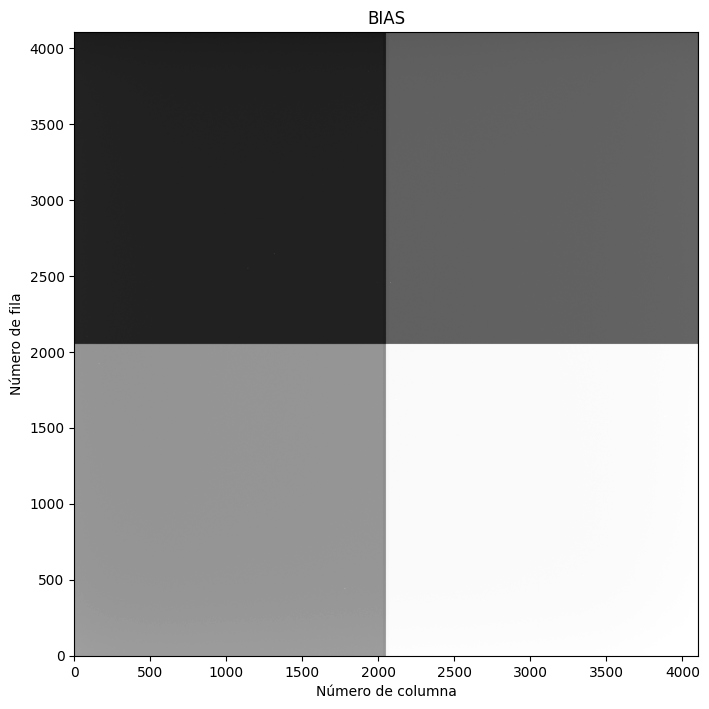

In [ ]:
fig= plt.figure(1,figsize=(9.1,8.1))    # se toma este figsize porque la imagen es cuadrada de 4100x 4100 pixeles
ax= fig.add_subplot(111)
ax.imshow(bias_frames[0], cmap='Greys_r',origin='lower',vmin=3200,vmax=3900)
ax.set_title('BIAS')
ax.set_xlabel('Número de columna')
ax.set_ylabel('Número de fila')
plt.show()

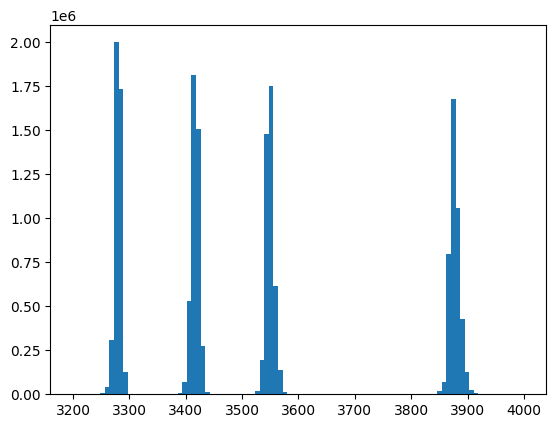

In [ ]:
#usamos este pequeño histograma para fijar los valores de vmin y vmax arriba y para el masterbias
#acá también se evidencia que tenemos 4 detectores, porque las cuentas se agrupan en 4 sectores
plt.hist(bias_frames[0].flatten(),bins=np.linspace(3200,4000,100))
plt.show()

A partir de la imagen anterior es sencillo darse cuenta de que los bias para cada pedacito del detector son bastante diferentes

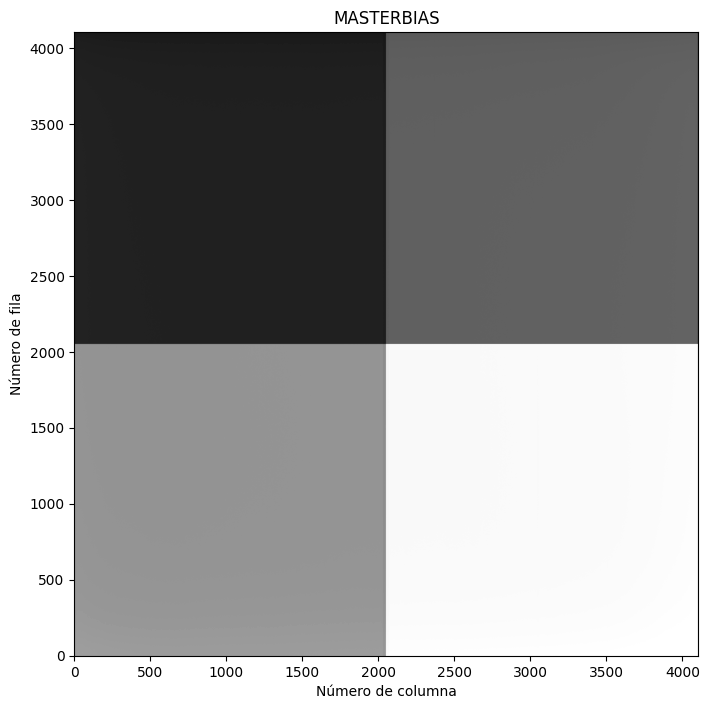

In [ ]:

masterbias= np.median(bias_frames,axis=0)

fig= plt.figure(1,figsize=(9.1,8.1))    # se toma este figsize porque la imagen es cuadrada de 4100x 4100 pixeles
ax= fig.add_subplot(111)
ax.imshow(masterbias, cmap='Greys_r',origin='lower',vmin=3200,vmax=3900)
ax.set_title('MASTERBIAS')
ax.set_xlabel('Número de columna')
ax.set_ylabel('Número de fila')
plt.show()

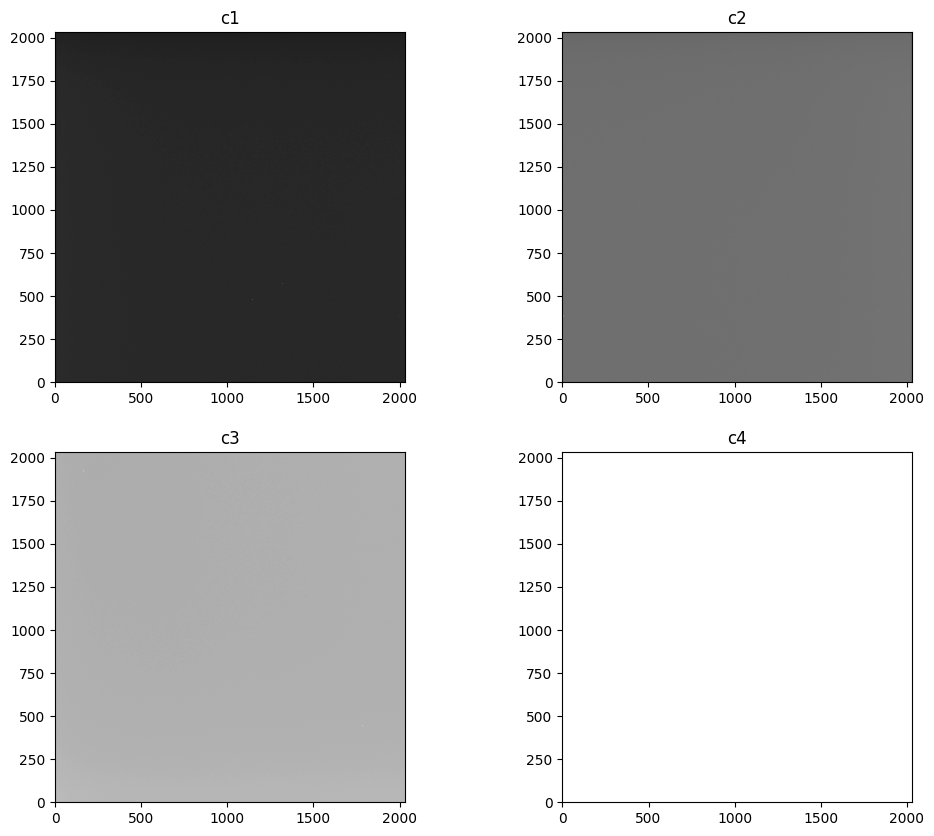

In [ ]:
#ahora queremos graficar los valores de las cuentas en una fila al medio de cada cuadrante
#para ello primero vamos a usar los slicings para seleccionar cada cuadrante

c1= bias_frames[0][2073:4104,0:2032]
c2= bias_frames[0][2073:4104,2073:4104]
c3= bias_frames[0][0:2032,0:2032]
c4= bias_frames[0][0:2032,2073:4104]

# y hacemos lo mismo par el masterbias

c1_mb= masterbias[2073:4104,0:2032]
c2_mb= masterbias[2073:4104,2073:4104]
c3_mb= masterbias[0:2032,0:2032]
c4_mb= masterbias[0:2032,2073:4104]

#creamos listas con estos valores para despues calcular cosas con ellos
# de forma mas rapida

mb_list= [c1_mb,c2_mb,c3_mb,c4_mb]
bias_clist= [c1,c2,c3,c4]

#graficamos los cuadrantes seleccionados

fig, axs= plt.subplots(2,2,figsize=(12,10))    # se toma este figsize porque la imagen es cuadrada de 4100x 4100 pixeles

axs[0,0].imshow(c1, cmap='Greys_r',origin='lower',vmin=3200,vmax=3800)
axs[0,0].set_title('c1')

axs[0,1].imshow(c2, cmap='Greys_r',origin='lower',vmin=3200,vmax=3800)
axs[0,1].set_title('c2')

axs[1,0].imshow(c3, cmap='Greys_r',origin='lower',vmin=3200,vmax=3800)
axs[1,0].set_title('c3')

axs[1,1].imshow(c4, cmap='Greys_r',origin='lower',vmin=3200,vmax=3800)
axs[1,1].set_title('c4')

plt.show()


Con el grafico anterior podemos ver que efectivamente seleccionamos bien cada cuadrante de la imagen original

In [ ]:
# Ahora como vemos para graficar las cuentas de una fila por numero de columna
# basta con elegir la fila 1000 de cada cuadrante para el bias cualquiera y el masterbias

fila_c1= c1[1000,:]
fila_c2= c2[1000,:]
fila_c3= c3[1000,:]
fila_c4= c4[1000,:]

f1mb= c1_mb[1000,:]    #filas del masterbias
f2mb= c2_mb[1000,:]
f3mb= c3_mb[1000,:]
f4mb= c4_mb[1000,:]

#Calculamos el promedio y la desviación estándar del bias cualquiera y del masterbias
#para cada cuadrante, recordar que son 4 amplificadores diferentes

prom_mb= []
prom_bc= []
std_mb= []
std_bc= []
for i in range(len(mb_list)):
  prom_mb.append(np.mean(mb_list[i].flatten(),axis=0))
  prom_bc.append(np.mean(bias_clist[i].flatten(),axis=0))
  std_mb.append(np.std(mb_list[i].flatten(),axis=0))
  std_bc.append(np.std(bias_clist[i].flatten(),axis=0))



#prom_bc= np.mean(bias_frames[0],axis=0)
#std_bc= np.std(bias_frames[0],axis=0)

#y los cuadrantes tienen aprox 2032 columnas como parece indicar el slicing
# así que vamos a tomar 2031 para evitar errores con los indices como veremos
# en el gráfico en la celda siguiente
columnas= np.arange(0,2031)

print(prom_mb)
print(std_mb)


[3277.2472504187067, 3415.3266489064986, 3547.138100069169, 3876.0124550762393]
[3.8965309001924733, 4.7738536618663, 6.0776703115627315, 8.334463330887546]


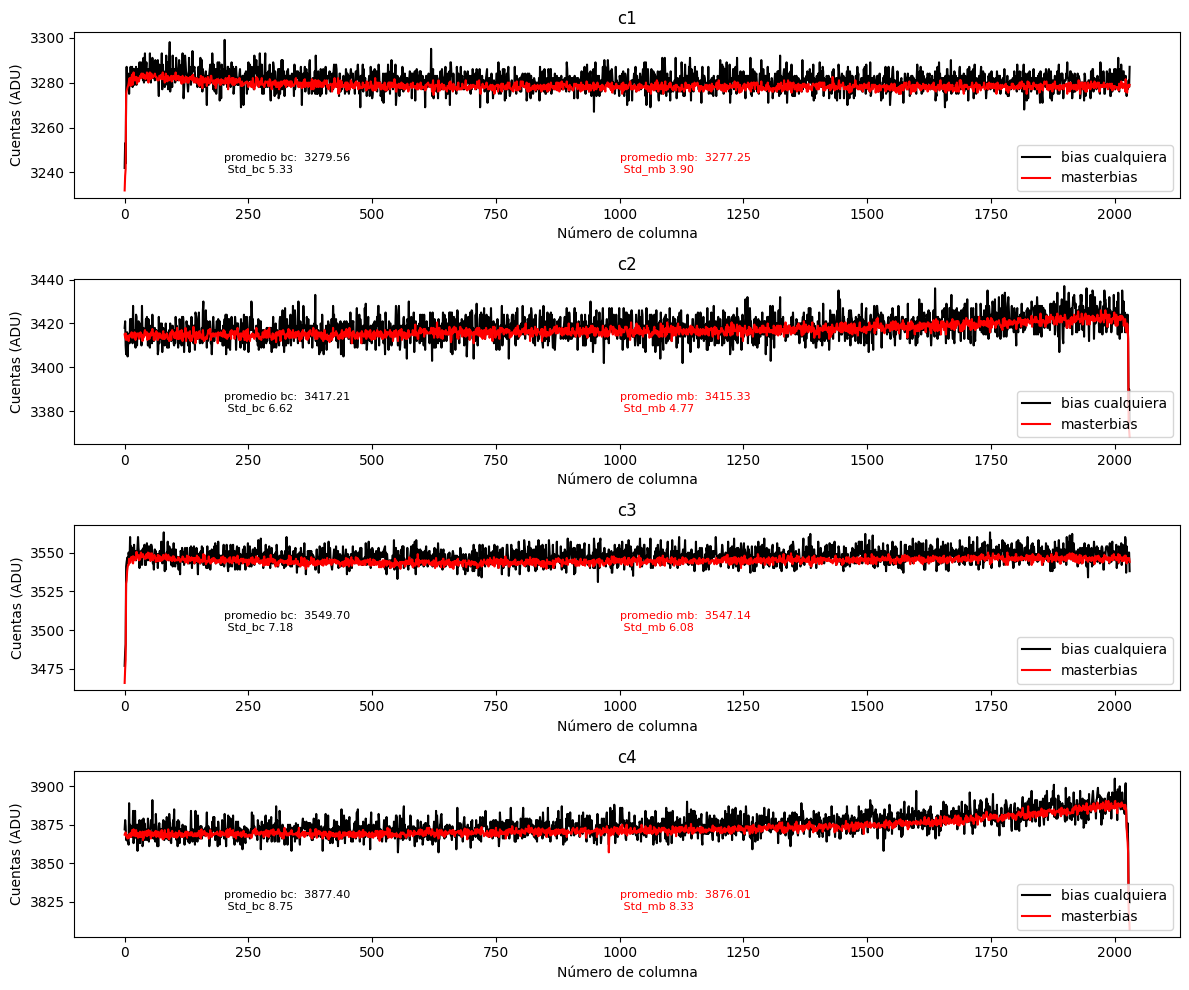

In [ ]:
# Luego procede copiar el grafico anterior para tener un grafico por cada cuadrante
fig, axs= plt.subplots(4,1,figsize=(12,10))    # se toma este figsize porque la imagen es cuadrada de 4100x 4100 pixeles

#es importante mencionar que para graficar bien tomamos el indice de algunas filas dado
#que traen un pixel más (por como se hace el slicing con los cuadrantes) y para que coincidan
# los ejes columnas vs filas tomamos esta indexación [0:2031]

axs[0].plot(columnas,fila_c1[0:2031],'k',label='bias cualquiera')
axs[0].plot(columnas,f1mb[0:2031],'r',label='masterbias')
axs[0].set_title('c1')
axs[0].set_xlabel('Número de columna')
axs[0].set_ylabel('Cuentas (ADU)')
axs[0].legend(loc='lower right')         #le damos una ubicacion al label
axs[0].text(1000,3240,f'promedio mb: {prom_mb[0]: .2f}\n Std_mb{std_mb[0]: .2f}',c='r',fontsize=8)
axs[0].text(200,3240,f'promedio bc: {prom_bc[0]: .2f}\n Std_bc{std_bc[0]: .2f}',c='k',fontsize=8)

axs[1].plot(columnas,fila_c2,'k',label='bias cualquiera')
axs[1].plot(columnas,f2mb,'r',label='masterbias')
axs[1].set_title('c2')
axs[1].set_xlabel('Número de columna')
axs[1].set_ylabel('Cuentas (ADU)')
axs[1].legend(loc='lower right')
axs[1].text(1000,3380,f'promedio mb: {prom_mb[1]: .2f}\n Std_mb{std_mb[1]: .2f}',c='r',fontsize=8)
axs[1].text(200,3380,f'promedio bc: {prom_bc[1]: .2f}\n Std_bc{std_bc[1]: .2f}',c='k',fontsize=8)


axs[2].plot(columnas,fila_c3[0:2031],'k',label='bias cualquiera')
axs[2].plot(columnas,f3mb[0:2031],'r',label='masterbias')
axs[2].set_title('c3')
axs[2].set_xlabel('Número de columna')
axs[2].set_ylabel('Cuentas (ADU)')
axs[2].legend(loc='lower right')
axs[2].text(1000,3500,f'promedio mb: {prom_mb[2]: .2f}\n Std_mb{std_mb[2]: .2f}',c='r',fontsize=8)
axs[2].text(200,3500,f'promedio bc: {prom_bc[2]: .2f}\n Std_bc{std_bc[2]: .2f}',c='k',fontsize=8)


axs[3].plot(columnas,fila_c4,'k',label='bias cualquiera')
axs[3].plot(columnas,f4mb,'r',label='masterbias')
axs[3].set_title('c4')
axs[3].set_xlabel('Número de columna')
axs[3].set_ylabel('Cuentas (ADU)')
axs[3].legend(loc='lower right')
axs[3].text(1000,3820,f'promedio mb: {prom_mb[-1]: .2f}\n Std_mb{std_mb[-1]: .2f}',c='r',fontsize=8)
axs[3].text(200,3820,f'promedio bc: {prom_bc[-1]: .2f}\n Std_bc{std_bc[-1]: .2f}',c='k',fontsize=8)

plt.tight_layout()   # usamos tight_layout porque me ajusta automaticamente los graficos
plt.show()           #para que no se superpongan entre si

Cabe notar que esto lo podemos hacer de forma mas óptima dandole un poco más de tiempo y haciendo un ciclo al momento de graficar, de modo que podamos recorrer los ejes, los datos a graficar, la ubicacion del texto, etc.

## **Paso 3**
Crear y visualizar los masterflats para cada filtro

In [ ]:
#primero creamos las listas para almacenar los datos
texp_flat=[]
obj_flat=[]
filt_flat=[]

#luego iteramos sobre las imagenes para seleccionar lo importante
for i in all_files:
  hdu=pf.open(i)
  header=hdu[0].header
  if header['IMGTYPE']=='FLAT':
    texp_flat.append(header['EXPTIME'])
    obj_flat.append(header['OBJECT'])
    filt_flat.append(header['FILTERID'])

#finalmente imprimimos los valores de las listas
for i in range(len(texp_flat)):
  print('texp=',texp_flat[i],'  objeto=',obj_flat[i],'  filtro=',filt_flat[i])

texp= 5.0   objeto= sky flat   filtro= V
texp= 10.0   objeto= sky flat   filtro= I
texp= 5.0   objeto= sky flat   filtro= V
texp= 15.0   objeto= sky flat   filtro= I
texp= 25.0   objeto= sky flat   filtro= I
texp= 10.0   objeto= sky flat   filtro= I
texp= 5.0   objeto= sky flat   filtro= V
texp= 20.0   objeto= sky flat   filtro= V
texp= 5.0   objeto= sky flat   filtro= V


En este punto como bien vemos hay dos filtros, y el flat que es una imagen que depende del camino óptico que recorre la luz va a ser distinto según el filtro que se utilice, por lo tanto, para hacer bien la reducción hay que hacer un masterflat para cada filtro.

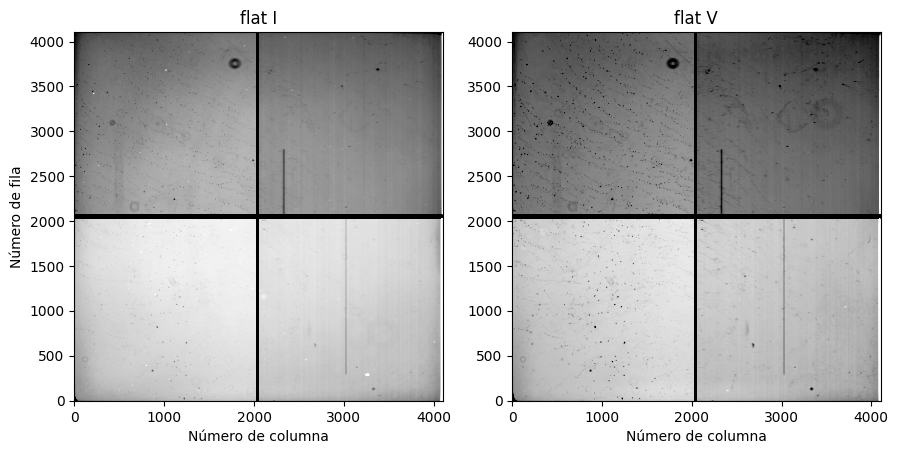

In [ ]:
#Ahora debemos crear un masterflat para cada uno de los filtros
# asi que seleccionamos los flats de cada filtro

flat_I= []
flat_V= []

for i in flats:
  if i[0].header['FILTERID']=='I':
    flat_I.append(i[0].data)
  elif i[0].header['FILTERID']=='V':
    flat_V.append(i[0].data)

#Para orientarnos mejor y resolver dudas grafiquemos un flat de cada filtro para hacernos una idea
fig, axs= plt.subplots(1,2,figsize=(9.1,8.1))
axs[0].imshow(flat_I[0], cmap='Greys_r',vmin=15000,vmax=20000,origin='lower')
axs[0].set_title('flat I')
axs[0].set_xlabel('Número de columna')
axs[0].set_ylabel('Número de fila')

axs[1].imshow(flat_V[0], cmap='Greys_r',vmin=23000,vmax=30000,origin='lower')
axs[1].set_title('flat V')
axs[1].set_xlabel('Número de columna')

plt.tight_layout()
plt.show()

Al graficar vemos que claramente los flat son distintos en cada filtro

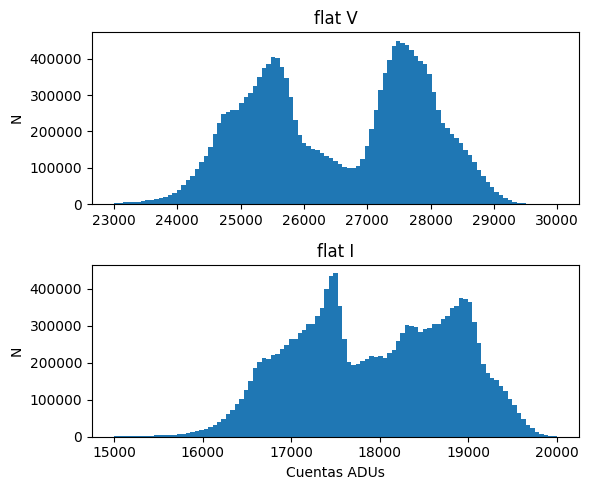

In [ ]:
#Con estos histogramas fijamos los valores vmin y vmax para visualizar el flat de cada filtro
fig, axs= plt.subplots(2,figsize=(6,5))
axs[0].hist(flat_V[0].flatten(),bins=np.linspace(23000,30000,100))
axs[0].set_title('flat V')
axs[0].set_ylabel('N')

axs[1].hist(flat_I[0].flatten(),bins=np.linspace(15000,20000,100))
axs[1].set_title('flat I')
axs[1].set_xlabel('Cuentas ADUs')
axs[1].set_ylabel('N')

plt.tight_layout()
plt.show()

In [ ]:
#Calculamos el masterfalt por filtro
flatI_norm=[]
flatV_norm=[]

for fl in range(len(flat_I)):    # vamos en el rango de la lista para restarle a cada flat es masterbias
  flat_subI= flat_I[fl] -masterbias
  flatI_norm.append(flat_subI/np.median(flat_subI))      #Ahora normalizamos y lo añadimos a una lista
  flat_subV= flat_V[fl] -masterbias
  flatV_norm.append(flat_subV/np.median(flat_subV))

masterflat_I= np.median(np.array(flatI_norm),axis=0)    #finalmente obtenemos el masterflat con la mediana de la lista
masterflat_V= np.median(np.array(flatV_norm),axis=0)    #de los flats normalizados (por filtro)

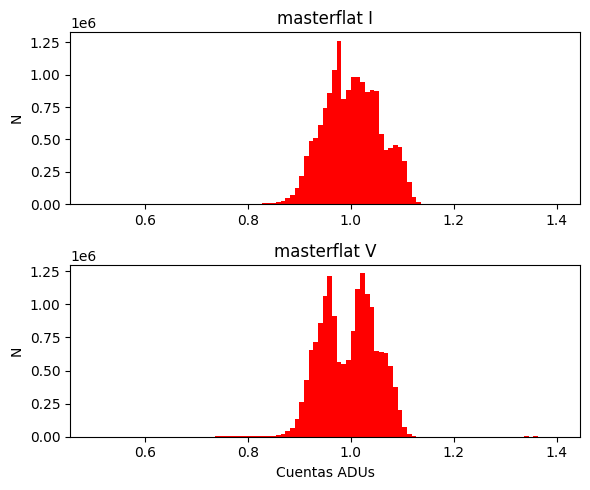

In [ ]:
#hacemos lo mismo que con el histograma d elos flat normales, pero
#teniendo en cuenta que como estan normalizados el valor va entre 0 y 1 por lo general
fig, axs= plt.subplots(2,figsize=(6,5))
axs[0].hist(masterflat_I.flatten(),bins=np.linspace(0.5,1.4,100),color='r')
axs[0].set_title('masterflat I')
axs[0].set_ylabel('N')

axs[1].hist(masterflat_V.flatten(),bins=np.linspace(0.5,1.4,100),color='r')
axs[1].set_title('masterflat V')
axs[1].set_xlabel('Cuentas ADUs')
axs[1].set_ylabel('N')

plt.tight_layout()
plt.show()

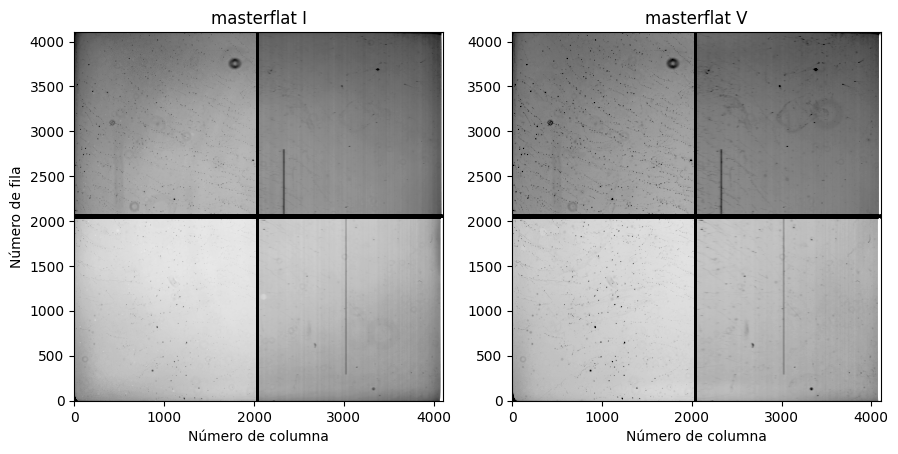

In [ ]:
#Ahora graficamos los masterflat por cada filtro
fig, axs= plt.subplots(1,2,figsize=(9.1,8.1))
axs[0].imshow(masterflat_I, cmap='Greys_r',vmin=0.8,vmax=1.17,origin='lower')
axs[0].set_title('masterflat I')
axs[0].set_xlabel('Número de columna')
axs[0].set_ylabel('Número de fila')

axs[1].imshow(masterflat_V, cmap='Greys_r',vmin=0.8,vmax=1.17,origin='lower')
axs[1].set_title('masterflat V')
axs[1].set_xlabel('Número de columna')

plt.tight_layout()
plt.show()

## **Paso 4**
Graficar las imagenes en crudo y reducidas y luego almacenarlas en un archivo FITS

In [ ]:
#recordemos que tenemos las imágenes de ciencia almacenadas en science_frames
#falta seleccionarlas por su filtro para graficarlas por filtro, en crudo

t_exp_I= []
t_exp_V= []
for i in science_frames:
  if i[0].header['FILTERID']=='I':
    scf_I= i[0].data
    scf_I_reducida= (i[0].data - masterbias)/masterflat_I
    t_exp_I.append(i[0].header['EXPTIME'])
  elif i[0].header['FILTERID']=='V':
    scf_V= i[0].data
    scf_V_reducida= (i[0].data - masterbias)/masterflat_V
    t_exp_V.append(i[0].header['EXPTIME'])


#aprovechamos de almacenar el tiempo de exposicion de cada imagen porque lo vamos
#a necesitar mas adelante

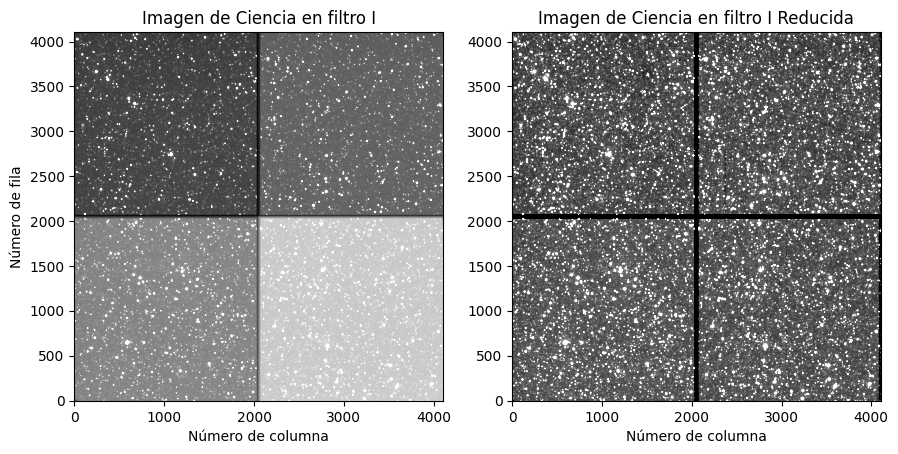

In [ ]:
#graficamos las imagenes raw y reducida en filtro I

fig, axs= plt.subplots(1,2,figsize=(9.1,8.1))
axs[0].imshow(scf_I, cmap='Greys_r',vmin=3200,vmax=4500,origin='lower')
axs[0].set_title('Imagen de Ciencia en filtro I')
axs[0].set_xlabel('Número de columna')
axs[0].set_ylabel('Número de fila')

axs[1].imshow(scf_I_reducida, cmap='Greys_r',vmin=130,vmax=450,origin='lower')
axs[1].set_title('Imagen de Ciencia en filtro I Reducida')
axs[1].set_xlabel('Número de columna')

plt.tight_layout()
plt.show()

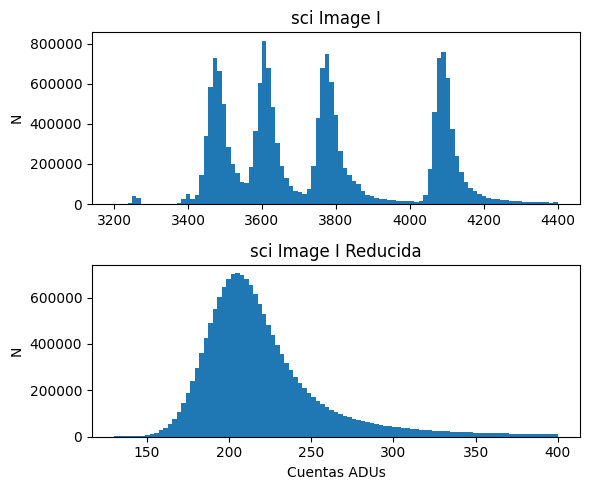

In [ ]:
fig, axs= plt.subplots(2,figsize=(6,5))
axs[0].hist(scf_I.flatten(),bins=np.linspace(3200,4400,100))
axs[0].set_title('sci Image I')
axs[0].set_ylabel('N')

axs[1].hist(scf_I_reducida.flatten(),bins=np.linspace(130,400,100))
axs[1].set_title('sci Image I Reducida')
axs[1].set_xlabel('Cuentas ADUs')
axs[1].set_ylabel('N')

plt.tight_layout()
plt.show()

In [ ]:
#ahora almacenamos la imagen reducida con su tiempo de exposicion

hdu_I= pf.PrimaryHDU(scf_I_reducida)
hdu_I.header['EXPTIME']= t_exp_I[0]
hdu_I.header['FILTERID']= 'I'
hdu_I.header['History']= 'Imagen reducida'
hdu_I.writeto('sci_I_reducida.fits',overwrite=True)


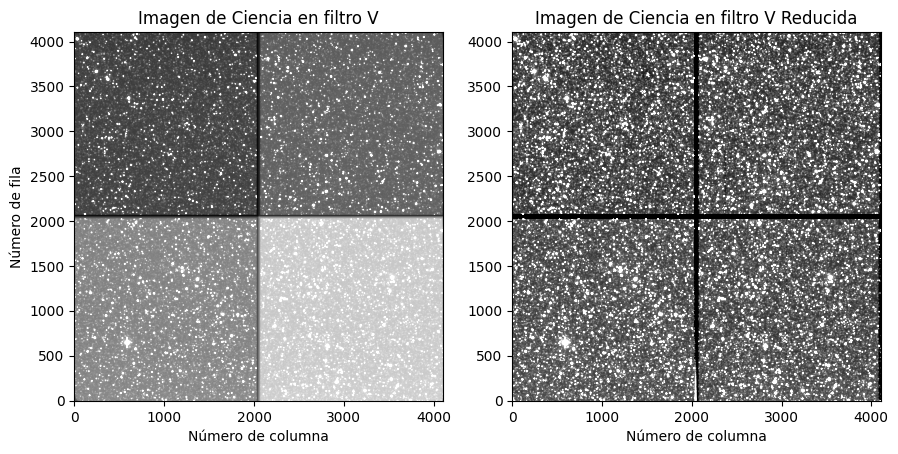

In [ ]:
#graficamos las imagenes raw y reducida en filtro V

fig, axs= plt.subplots(1,2,figsize=(9.1,8.1))
axs[0].imshow(scf_V, cmap='Greys_r',vmin=3200,vmax=4500,origin='lower')
axs[0].set_title('Imagen de Ciencia en filtro V')
axs[0].set_xlabel('Número de columna')
axs[0].set_ylabel('Número de fila')

axs[1].imshow(scf_V_reducida, cmap='Greys_r',vmin=130,vmax=500,origin='lower')
axs[1].set_title('Imagen de Ciencia en filtro V Reducida')
axs[1].set_xlabel('Número de columna')

plt.tight_layout()
plt.show()

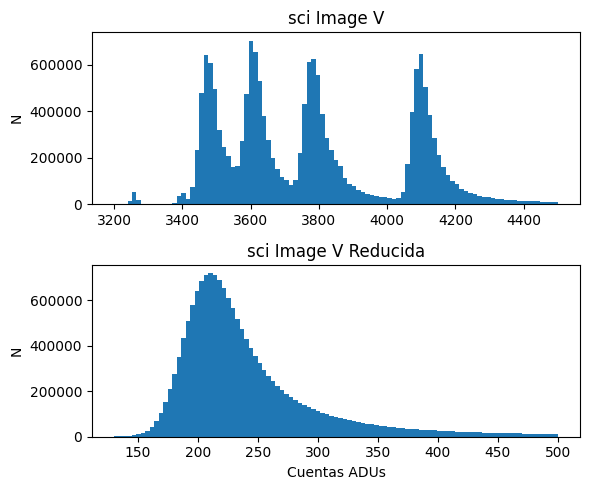

In [ ]:
fig, axs= plt.subplots(2,figsize=(6,5))
axs[0].hist(scf_V.flatten(),bins=np.linspace(3200,4500,100))
axs[0].set_title('sci Image V')
axs[0].set_ylabel('N')

axs[1].hist(scf_V_reducida.flatten(),bins=np.linspace(130,500,100))
axs[1].set_title('sci Image V Reducida')
axs[1].set_xlabel('Cuentas ADUs')
axs[1].set_ylabel('N')

plt.tight_layout()
plt.show()

In [ ]:
#finalmente almacenamos en un hdu la imagen reducida en filtro V
hdu_V= pf.PrimaryHDU(scf_V_reducida)
hdu_V.header['EXPTIME']= t_exp_V[0]
hdu_V.header['FILTERID']= 'V'
hdu_V.header['History']= 'Imagen reducida'
hdu_V.writeto('sci_V_reducida.fits',overwrite=True)

In [ ]:
#descargamos las imagenes
from google.colab import files
files.download('sci_I_reducida.fits')
files.download('sci_V_reducida.fits')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>